In [4]:
import pandas as pd
# Read data
df = pd.read_csv(r'E:\python\kpmi_ru_data.csv\kpmi_ru_data.csv')
print(df)

       q1  t1  q2  t2  q3  t3  q4  t4  q5  t5  ...  t63   e   i   s   n   t  \
0       1   8   2   8   2   8   1   8   1   8  ...    8  32  18  16  19  26   
1       1   8   1   8   1   8   2   8   1   8  ...    8  28  15  27  18  23   
2       1   8   1   8   1   8   1   8   1   8  ...    8  25  15  25  16  19   
3       2   8   1   8   1   8   1   8   1   8  ...    8  30  15  25  14  33   
4       2   8   2   8   1   8   1   8   1   8  ...    8  22  22  23  18  33   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..   
99995   1   8   2   8   1   8   2   8   2   8  ...    8  32  18  27  16  33   
99996   1   8   2   8   2   8   1   8   2   8  ...    8  20  26  37  12  37   
99997   1   8   2   8   1   8   1   8   1   8  ...    8  22  18  23  19  26   
99998   2   8   2   8   1   8   1   8   1   8  ...    8  22  18  21  23  33   
99999   1   8   1   8   1   8   1   8   2   8  ...    8  38   9  39  12  37   

        f   j   p  psychotype  
0      24  19  44  

In [5]:
# Delete null values
df_clean = df.dropna()
print(df_clean)

       q1  t1  q2  t2  q3  t3  q4  t4  q5  t5  ...  t63   e   i   s   n   t  \
0       1   8   2   8   2   8   1   8   1   8  ...    8  32  18  16  19  26   
1       1   8   1   8   1   8   2   8   1   8  ...    8  28  15  27  18  23   
2       1   8   1   8   1   8   1   8   1   8  ...    8  25  15  25  16  19   
3       2   8   1   8   1   8   1   8   1   8  ...    8  30  15  25  14  33   
4       2   8   2   8   1   8   1   8   1   8  ...    8  22  22  23  18  33   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..   
99995   1   8   2   8   1   8   2   8   2   8  ...    8  32  18  27  16  33   
99996   1   8   2   8   2   8   1   8   2   8  ...    8  20  26  37  12  37   
99997   1   8   2   8   1   8   1   8   1   8  ...    8  22  18  23  19  26   
99998   2   8   2   8   1   8   1   8   1   8  ...    8  22  18  21  23  33   
99999   1   8   1   8   1   8   1   8   2   8  ...    8  38   9  39  12  37   

        f   j   p  psychotype  
0      24  19  44  

In [6]:
# Select all columns in df_clean with numeric data types (either int or float) in preparation for outlier processing.
numeric_cols = df_clean.select_dtypes(include='number').columns

# Replace the outliers (utilizing the Interquartile Range (IQR) rule) with the median value of the column.
df_processed = df_clean.copy()

for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_processed[col].median()

    # Replace outliers
    df_processed[col] = df_processed[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
                                           
print(df_processed.info())
print(df_processed)                                                                                              
df_processed.to_csv(r'E:\python\kpmi_ru_data(Cleaned).csv', index = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 133 entries, q1 to psychotype
dtypes: float64(75), int64(57), object(1)
memory usage: 101.5+ MB
None
       q1   t1  q2   t2  q3   t3  q4   t4  q5   t5  ...  t63     e     i  \
0       1  8.0   2  8.0   2  8.0   1  8.0   1  8.0  ...  8.0  32.0  18.0   
1       1  8.0   1  8.0   1  8.0   2  8.0   1  8.0  ...  8.0  28.0  15.0   
2       1  8.0   1  8.0   1  8.0   1  8.0   1  8.0  ...  8.0  25.0  15.0   
3       2  8.0   1  8.0   1  8.0   1  8.0   1  8.0  ...  8.0  30.0  15.0   
4       2  8.0   2  8.0   1  8.0   1  8.0   1  8.0  ...  8.0  22.0  22.0   
...    ..  ...  ..  ...  ..  ...  ..  ...  ..  ...  ...  ...   ...   ...   
99995   1  8.0   2  8.0   1  8.0   2  8.0   2  8.0  ...  8.0  32.0  18.0   
99996   1  8.0   2  8.0   2  8.0   1  8.0   2  8.0  ...  8.0  20.0  26.0   
99997   1  8.0   2  8.0   1  8.0   1  8.0   1  8.0  ...  8.0  22.0  18.0   
99998   2  8.0   2  8.0   1  8.0   1  8.0   1  8.0  .

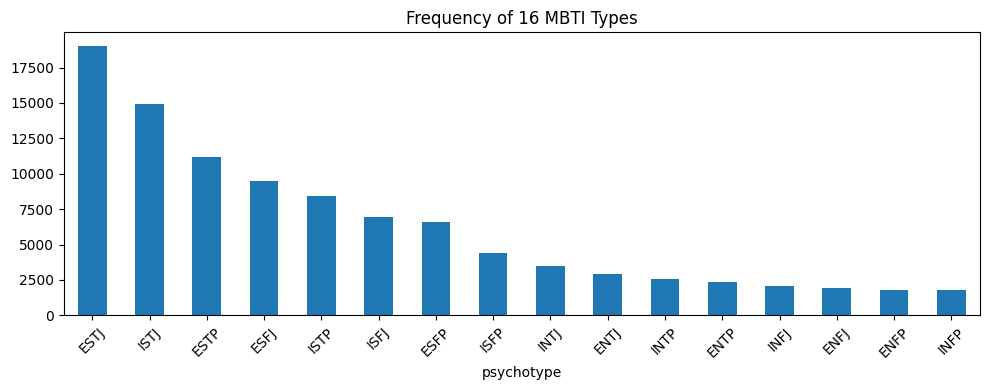

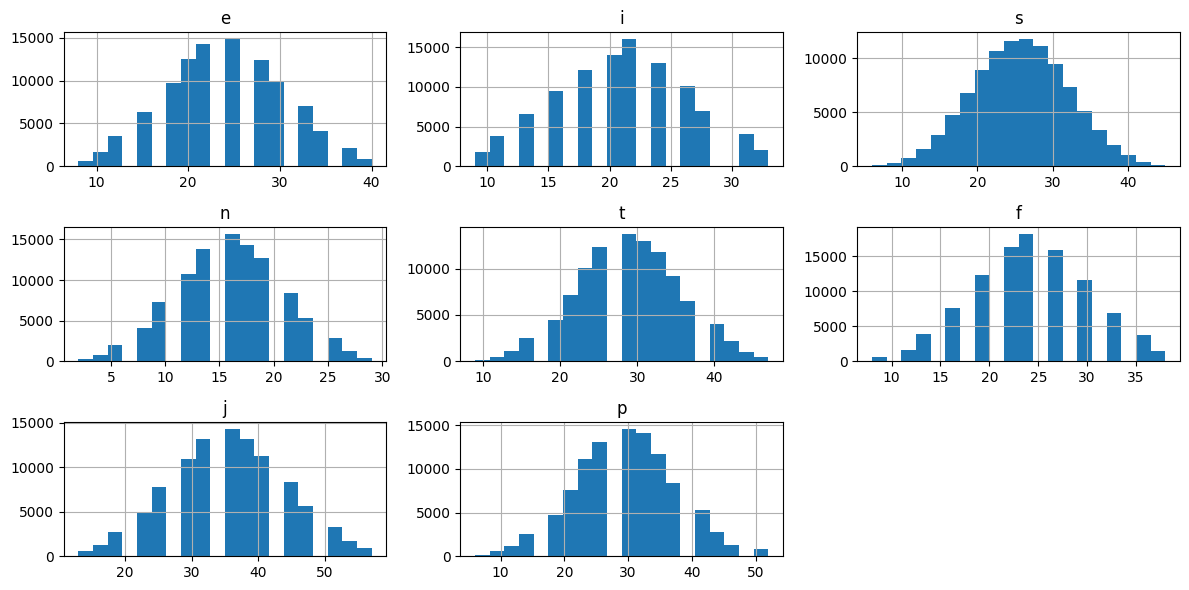

      count   mean   std   min   25%   50%   75%   max  skew  kurt
e  100000.0  24.00  6.52   8.0  20.0  25.0  28.0  40.0  0.02 -0.38
i  100000.0  21.00  5.43   9.0  18.0  22.0  24.0  33.0 -0.06 -0.44
s  100000.0  26.19  6.65   6.0  21.0  27.0  31.0  45.0 -0.09 -0.19
n  100000.0  16.12  4.71   2.0  12.0  16.0  19.0  29.0 -0.11 -0.05
t  100000.0  28.89  6.64   9.0  23.0  28.0  33.0  47.0  0.00 -0.25
f  100000.0  24.05  5.92   8.0  19.0  24.0  27.0  38.0 -0.08 -0.25
j  100000.0  35.41  8.80  13.0  29.0  35.0  41.0  57.0  0.01 -0.31
p  100000.0  29.34  7.93   6.0  23.0  29.0  35.0  52.0  0.05 -0.19


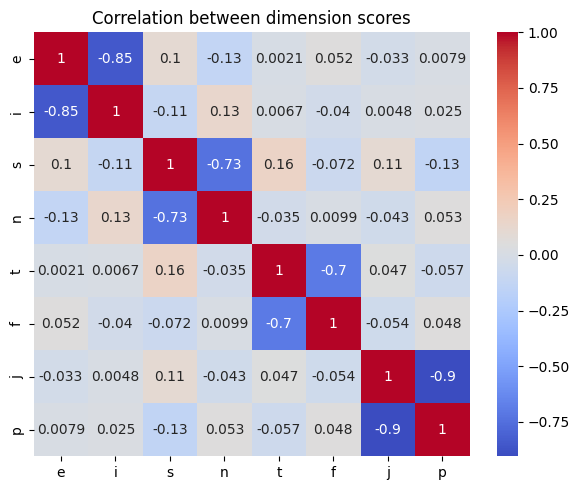

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


FILE_PATH = r"E:\python\kpmi_ru_data(Cleaned).csv"
df = pd.read_csv(FILE_PATH)

# 2) Frequency histogram
plt.figure(figsize=(10,4))
df['psychotype'].value_counts().plot(kind='bar')
plt.title('Frequency of 16 MBTI Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Histogram of scores for each dimension
score_cols = list('eisntfjp')
df[score_cols].hist(bins=20, figsize=(12,6))
plt.tight_layout()
plt.show()

# 4) Descriptive statistics (mean, standard deviation, quartiles, skewness, kurtosis)
stats = df[score_cols].describe().T
stats['skew']  = df[score_cols].skew()
stats['kurt']  = df[score_cols].kurt()
print(stats.round(2))

# 5)Heatmap of the correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between dimension scores')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# 1) Read in the cleaned CSV.
FILE_PATH = r"E:\python\kpmi_ru_data(Cleaned).csv"   
df = pd.read_csv(FILE_PATH)

# 2) Extract the columns of four dimensions.（IE, SN, TF, JP）
mbti = df['psychotype'].astype(str).str.upper().dropna()
df_dims = pd.DataFrame({
    'IE': mbti.str[0],   # E 或 I
    'SN': mbti.str[1],   # S 或 N
    'TF': mbti.str[2],   # T 或 F
    'JP': mbti.str[3]    # J 或 P
})

# 3)Construct a 2×2×2×2 contingency table: Obtain the observed frequencies of 16 cells. counts[i,j,k,l]
import pandas as pd
import numpy as np

# Define dimension labels
index = pd.MultiIndex.from_product(
    [['E','I'], ['S','N'], ['T','F'], ['J','P']],
    names=['IE','SN','TF','JP']
)

# Build a DataFrame, using the values of counts as columns.
counts_df = pd.DataFrame({
    'Count': counts.flatten()
}, index=index)

print(counts_df.head(10))


             Count
IE SN TF JP       
E  S  T  J   19038
         P   11168
      F  J    9506
         P    6604
   N  T  J    2933
         P    2333
      F  J    1914
         P    1802
I  S  T  J   14935
         P    8426


In [4]:
# Calculate marginal distribution and total number
N_IE = counts.sum(axis=(1,2,3))
N_SN = counts.sum(axis=(0,2,3))
N_TF = counts.sum(axis=(0,1,3))
N_JP = counts.sum(axis=(0,1,2))
N = counts.sum()


marginals = pd.DataFrame({
    'Dimension': ['IE', 'IE', 'SN', 'SN', 'TF', 'TF', 'JP', 'JP'],
    'Category': ['E', 'I', 'S', 'N', 'T', 'F', 'J', 'P'],
    'Count': np.concatenate([N_IE, N_SN, N_TF, N_JP])
})


print(marginals)





  Dimension Category  Count
0        IE        E  55298
1        IE        I  44702
2        SN        S  81094
3        SN        N  18906
4        TF        T  64882
5        TF        F  35118
6        JP        J  60894
7        JP        P  39106


In [6]:
#Calculate the expected frequency E[i,j,k,l] of each cell based on the completely independent assumption.
E = np.zeros_like(counts, dtype=float)
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                E[i,j,k,l] = (
                    (N_IE[i]/N) *
                    (N_SN[j]/N) *
                    (N_TF[k]/N) *
                    (N_JP[l]/N)
                ) * N

index = pd.MultiIndex.from_product(
    [['E', 'I'], ['S', 'N'], ['T', 'F'], ['J', 'P']],
    names=['IE', 'SN', 'TF', 'JP']
)

expected_df = pd.DataFrame({
    'Expected_Count': E.flatten()
}, index=index).round(2)

print(expected_df)



             Expected_Count
IE SN TF JP                
E  S  T  J         17717.27
         P         11378.00
      F  J          9589.64
         P          6158.45
   N  T  J          4130.55
         P          2652.63
      F  J          2235.70
         P          1435.76
I  S  T  J         14322.35
         P          9197.79
      F  J          7752.11
         P          4978.39
   N  T  J          3339.07
         P          2144.34
      F  J          1807.30
         P          1160.65


In [7]:
chi2_stat = ((counts - E)**2 / E).sum()
chi2_stat

np.float64(1342.93063615322)

In [8]:
df_val = 10
p_val = 1 - chi2.cdf(chi2_stat, df_val)
print(p_val)

0.0


In [10]:
if p_val < 0.05:
    print("Conclusion: Reject H₀ —— The four dimensions are not completely independent.")
else:
    print("Conclusion: H₀ cannot be rejected — the four dimensions can be regarded as independent.")


Conclusion: Reject H₀ —— The four dimensions are not completely independent.
